# LAB 2 : Multi Class Classification Using Perceptron 

Name : 

Roll Number : 



# **Problem 1** : Demonstrate the 2-input, 2-output neural network, to perform 4 class, classification task.

  1. Generate appropriate data synthetically (Ex: Multivariate Gaussian data with different mean vectors and Identity covariance matrix can be used )
  2. Have to convert the class labels (0, 1, 2, 3) to its corresponding binary value.
  3. Use appropriate activation function and learning rule .
  4. Draw the learned separating hyper planes in each iteration. (using the information
  from the learned weights).
  5. After the network is learned, a independent test set can be used to validate the performance. (Performance can be shown through accuracy/error percentage, justify
  the error by drawing the separating hyper-plane over the test set data (use different
  color code for different class label) )

##Write down the Objectives, Hypothesis and Experimental description for the above problem



=== Write your answer here ===

## Programming : 
  Please write a program to demonstrate the same

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [4]:
### Data Generation ###  Required Data -> Multivariate Gaussian Data with different mean vectors and Identity Covariance Matrix

def GenerateData(No_training,mean,variance):

  data = []
  for i in range(len(mean)):
    temp = np.random.multivariate_normal(mean[i],var[i],No_training)
    data.append(temp)

  return data

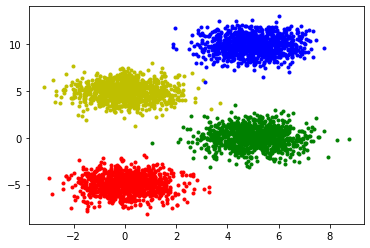

In [5]:
## Defining Mean and Variance for all the data points

dim = 2

mean1 = np.array([0,-5])
mean2 = np.array([0,5])
mean3 = np.array([5,0])
mean4 = np.array([5,10])

mean = [mean1,mean2,mean3,mean4]

var1 = np.diag(np.ones(dim))
var = [var1,var1,var1,var1]

data = GenerateData(1000,mean,var)

plt.figure()
plt.plot(data[0][:,0],data[0][:,1],'.',color='r')
plt.plot(data[1][:,0],data[1][:,1],'.',color='y')
plt.plot(data[2][:,0],data[2][:,1],'.',color='g')
plt.plot(data[3][:,0],data[3][:,1],'.',color='b')


In [7]:
## Augmenting Data
data_total = np.array(data).reshape(len(data)*data[0].shape[0],data[0].shape[1])
data_aug=np.concatenate((np.ones((data_total.shape[0],1)),data_total),axis=1)
print(data_aug.shape)


(4000, 3)


In [8]:
## Target Labels in Binary Format 

y1 = np.tile([-1,-1],(1000,1))
y2 = np.tile([-1,1],(1000,1))
y3 = np.tile([1,-1],(1000,1))
y4 = np.tile([1,1],(1000,1))

y_true = np.concatenate((y1,y2,y3,y4),axis=0)

Text(0.5, 1.0, 'Error vs Iteration')

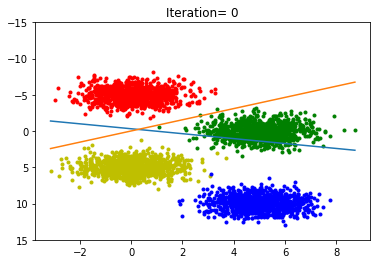

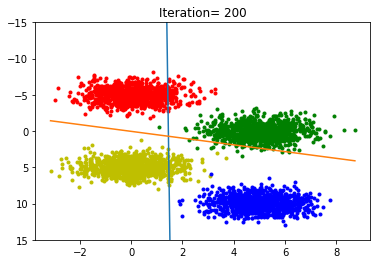

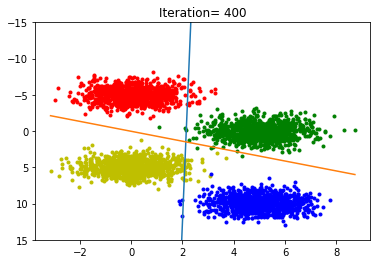

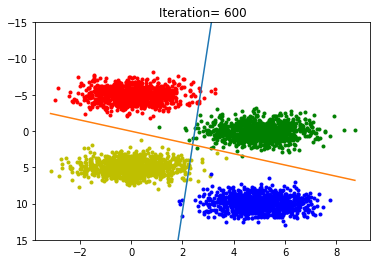

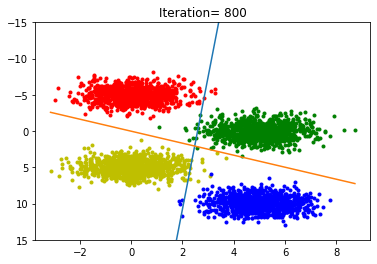

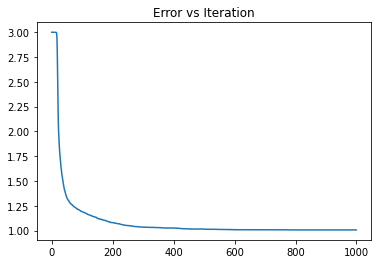

In [9]:
## Percepton Learning Loop

error_miss_norm=[]
lr = 0.01
w1 = np.random.uniform(-1,1,(data_aug.shape[1],1))
w2 = np.random.uniform(0,1,(data_aug.shape[1],1))
# w1 = np.array([0.2,0.4,0.3]).reshape(3,1)
# w2 = np.array([-0.1,0.3,0.6]).reshape(3,1)
for itr in range(1000):

  y_est1 = data_aug @ w1
  y_est2 = data_aug @ w2

  # Activation Value 

  y_pred1=np.ones(y_est1.shape)
  y_pred1[np.where(y_est1<=0)] = -1

  y_pred2=np.ones(y_est2.shape)
  y_pred2[np.where(y_est1<=0)] = -1

  # Perceptron Learning Law
  
  y_a = y_true[:,0].reshape(y_true[:,0].shape[0],1)
  grad_wlr1=(lr*((y_a-y_pred1).T @ data_aug).T)/(2*data_aug.shape[0])
  w1 = w1 + grad_wlr1

  y_b = y_true[:,1].reshape(y_true[:,1].shape[0],1)
  grad_wlr2=(lr*((y_b-y_pred2).T @ data_aug).T)/(2*data_aug.shape[0])
  w2 = w2 + grad_wlr2
  
  y_pred = np.concatenate((y_pred1,y_pred2),axis=1)
  err = np.square(np.subtract(y_pred, y_true)).mean()
  # miss = (np.sum(np.abs(y_true-y_pred)))/2
  # miss_norm=miss/data_aug.shape[0]
  error_miss_norm.append(err)

  if (np.remainder(itr,200)==0):
    # print('After iteration=',itr)
    # print('miss classified=',miss)
    x_dc=np.linspace(np.min(data_aug[:,1]),np.max(data_aug[:,1]),1000)
    leq1=((-w1[0]-(w1[1]*x_dc))/(w1[2]))
    leq2=((-w2[0]-(w2[1]*x_dc))/(w2[2]))
    plt.figure()
    plt.plot(data[0][:,0],data[0][:,1],'.',color='r')
    plt.plot(data[1][:,0],data[1][:,1],'.',color='y')
    plt.plot(data[2][:,0],data[2][:,1],'.',color='g')
    plt.plot(data[3][:,0],data[3][:,1],'.',color='b')
    plt.plot(x_dc,leq1)
    plt.plot(x_dc,leq2)
    plt.ylim((15,-15))
    plt.title('Iteration= %d' % (itr))

  if np.linalg.norm(grad_wlr1)<=10**(-5) and np.linalg.norm(grad_wlr2)<=10**(-5) :
    # plot the last converged iteration
    # print('After iteration=',itr)
    # print('miss classified=',miss)
    x_dc=np.linspace(np.min(data_aug[:,1]),np.max(data_aug[:,1]),1000)
    leq1=((-w1[0]-(w1[1]*x_dc))/(w1[2]))
    leq2=((-w2[0]-(w2[1]*x_dc))/(w2[2]))
    plt.figure()
    plt.plot(data[0][:,0],data[0][:,1],'.',color='r')
    plt.plot(data[1][:,0],data[1][:,1],'.',color='y')
    plt.plot(data[2][:,0],data[2][:,1],'.',color='g')
    plt.plot(data[3][:,0],data[3][:,1],'.',color='b')
    plt.plot(x_dc,leq1)
    plt.plot(x_dc,leq2)
    plt.ylim((15,-15))
    plt.title('Iteration= %d' % (itr))
    break

plt.figure()
plt.plot(error_miss_norm)
plt.title('Error vs Iteration')



5.0
testing accuracy percentage= 98.75


Text(0.5, 1.0, 'Testing accuracy percentage= 98.750000')

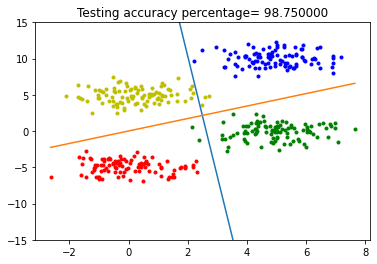

In [10]:
## Testing

dim = 2

mean1 = np.array([0,-5])
mean2 = np.array([0,5])
mean3 = np.array([5,0])
mean4 = np.array([5,10])

mean = [mean1,mean2,mean3,mean4]

var1 = np.diag(np.ones(dim))
var = [var1,var1,var1,var1]

data = GenerateData(100,mean,var)
data_test = np.array(data).reshape(len(data)*data[0].shape[0],data[0].shape[1])

y1 = np.tile([-1,-1],(100,1))
y2 = np.tile([-1,1],(100,1))
y3 = np.tile([1,-1],(100,1))
y4 = np.tile([1,1],(100,1))

y_test = np.concatenate((y1,y2,y3,y4),axis=0)

# data augmentation

w = np.concatenate((w1,w2),axis=1)
data_test_aug=np.concatenate((np.ones((data_test.shape[0],1)),data_test),axis=1)
y_est=data_test_aug @ w   # w is estimated during training
y_pred=np.ones(y_est.shape)
y_pred[np.where(y_est<=0)]=-1
miss=(np.sum(np.abs(y_test-y_pred)))/2 # no of miss classification  
print(miss)
miss_norm=miss/data_test_aug.shape[0]
accuracy=100*(1-miss_norm)
print('testing accuracy percentage=',accuracy)

#ploting
x_dc=np.linspace(np.min(data_test_aug[:,1]),np.max(data_test_aug[:,1]),1000)
leq1=((-w1[0]-(w1[1]*x_dc))/(w1[2]))
leq2=((-w2[0]-(w2[1]*x_dc))/(w2[2]))
plt.figure()
plt.plot(data[0][:,0],data[0][:,1],'.',color='r')
plt.plot(data[1][:,0],data[1][:,1],'.',color='y')
plt.plot(data[2][:,0],data[2][:,1],'.',color='g')
plt.plot(data[3][:,0],data[3][:,1],'.',color='b')
plt.plot(x_dc,leq1)
plt.plot(x_dc,leq2)
plt.ylim((-15,15))
plt.title('Testing accuracy percentage= %f' % (accuracy))

## Inferences and Conclusion : State all the key observations and conclusion

=== Write your answer here ===